# Tarea 2

Integrantes:
- Romina Loayza
- Nicolás Gutierrez
- Alfredo Aro

In [496]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # Import Statsmodels for statistical modeling
from sklearn.linear_model import LinearRegression # Import LinearRegression from scikit-learn for regression analysis
from sklearn.metrics import mean_squared_error, r2_score # Import metrics for model evaluation
from statsmodels.stats.diagnostic import het_breuschpagan, het_white # Import tests for heteroscedasticity
from scipy import stats
from tabulate import tabulate

## 1. Limpieza de la data

### Módulo Empleo

In [499]:
csv_path = os.path.join("data", "ENPOVE2022_V_600 Empleo.csv")
m_empleo= pd.read_csv(csv_path,encoding = "latin-1", low_memory=False)
m_empleo.columns= m_empleo.columns.str.lower()
m_empleo

,ï»¿ccdd,departamento,ccpp,provincia,ccdi,distrito,ciudad,conglomerado,nselv,vivienda,...,gedad1,gedad2,p625_d,p625_p,m622_1,m622_2,ingtot,ingtot_monetario,ingtot_no_monetario,factorfinal
0,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,2,2,1,1,1600,300,1900,1600,300,13.175820
1,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,0,0,,,,,,,,13.175820
2,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,3,3,1,1,,,1200,1200,0,13.175820
3,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1207001,9345,6,...,2,2,1,1,800,300,1100,800,300,26.351641
4,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1207001,9345,6,...,0,0,,,,,,,,26.351641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11616,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,393,12,...,2,2,1,1,,,1300,1300,0,18.422158
11617,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,393,12,...,1,1,1,1,,,1299,1299,0,18.422158
11618,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,396,13,...,3,3,1,1,,,312,312,0,12.281439
11619,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,396,13,...,3,4,,,,,,,,12.281439


### Módulo Residentes del Hogar

In [501]:
csv_path = os.path.join("data", "ENPOVE2022_V_200_Residentes.csv")
m_residentes= pd.read_csv(csv_path,encoding = "latin-1", low_memory=False)
m_residentes.columns= m_residentes.columns.str.lower()
m_residentes

,ï»¿ccdd,departamento,ccpp,provincia,ccdi,distrito,ciudad,conglomerado,nselv,vivienda,...,p211_n,p211_1,p200_aportante,p211_n_parentesco,p211_n_sexo,p211_n_aãos,p211_n_meses,p211_n_ecivil,p211_n_migrante,factorfinal
0,15,LIMA,1,LIMA,19,LURIN,Lima,29806,68378,12,...,2,4.Otro,,2,2,29,,1,1,133.030686
1,15,LIMA,1,LIMA,19,LURIN,Lima,29778,68073,9,...,1,4.Otro,,1,2,35,,1,1,133.030686
2,7,LIMA,1,CALLAO,1,CALLAO,Lima,1814802,16137,9,...,1,4.Otro,,1,2,35,,6,1,133.030686
3,14,LAMBAYEQUE,1,CHICLAYO,6,LA VICTORIA,Chiclayo,3976,4564,9,...,1,4.Otro,,1,2,17,,6,1,18.043333
4,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,12284,10250,9,...,5,4.Otro,,11,2,17,,1,1,26.351641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,4,AREQUIPA,1,AREQUIPA,7,JACOBO HUNTER,Arequipa,43374,14722,29,...,,,,,,,,,,66.313829
12483,4,AREQUIPA,1,AREQUIPA,7,JACOBO HUNTER,Arequipa,43377,14725,32,...,,,,,,,,,,132.627658
12484,4,AREQUIPA,1,AREQUIPA,7,JACOBO HUNTER,Arequipa,43377,14725,32,...,,,,,,,,,,132.627658
12485,4,AREQUIPA,1,AREQUIPA,7,JACOBO HUNTER,Arequipa,43410,14694,7,...,,,,,,,,,,132.627658


### Merge

In [503]:
columnas_comunes = ['ï»¿ccdd', 'ccpp', 'ccdi', 'conglomerado', 'nselv', 'vivienda', 'thogar', 'nhogar', 'p200_n']
#estas son las columnas comunes entra las dos bases de datos que nos ayudarán a realizar el merge

In [504]:
print("Contenido de las columnas comunes en m_residentes:")
print(m_residentes[columnas_comunes].head())

print("\nContenido de las columnas comunes en m_empleo:")
print(m_empleo[columnas_comunes].head())

Contenido de las columnas comunes en m_residentes:
   ï»¿ccdd  ccpp  ccdi  conglomerado  nselv  vivienda  thogar  nhogar  p200_n
0       15     1    19         29806  68378        12       1       1       5
1       15     1    19         29778  68073         9       1       1       6
2        7     1     1       1814802  16137         9       1       1       5
3       14     1     6          3976   4564         9       1       1       1
4        2    18     1         12284  10250         9       1       1       5

Contenido de las columnas comunes en m_empleo:
   ï»¿ccdd  ccpp  ccdi  conglomerado  nselv  vivienda  thogar  nhogar  p200_n
0        2    18     1       1206802   9340         3       1       1       1
1        2    18     1       1206802   9340         3       1       1       4
2        2    18     1       1206802   9340         3       1       1       5
3        2    18     1       1207001   9345         6       1       1       1
4        2    18     1       1207001   9345

### Creación de código único

In [506]:
m_residentes['codigo_unico'] = m_residentes[columnas_comunes].astype(str).agg('-'.join, axis=1)
m_empleo['codigo_unico'] = m_empleo[columnas_comunes].astype(str).agg('-'.join, axis=1)

In [507]:
for columna in columnas_comunes:
    m_residentes[columna] = m_residentes[columna].astype(str).str.strip()  
    m_empleo[columna] = m_empleo[columna].astype(str).str.strip() 

In [508]:
coincidencias = m_residentes['codigo_unico'].isin(m_empleo['codigo_unico'])
coincidencias

0        True
1        True
2        True
3        True
4        True
         ... 
12482    True
12483    True
12484    True
12485    True
12486    True
Name: codigo_unico, Length: 12487, dtype: bool

In [509]:
venezolanos = pd.merge(m_residentes, m_empleo, on='codigo_unico', how='inner', suffixes=('_residente', '_empleo'))

In [510]:
columnas_residente = set(venezolanos.filter(regex='_residente').columns)
columnas_empleo = set(venezolanos.filter(regex='_empleo').columns)

In [511]:
for col_residente in columnas_residente:
    # Identificar el nombre base de la columna
    col_base = col_residente.replace('_residente', '')
    col_empleo = col_base + '_empleo'
    
    if col_empleo in columnas_empleo:
        # Priorizar la columna de m_empleo
        venezolanos[col_base] = venezolanos[col_empleo]
        # Eliminar las columnas duplicadas
        venezolanos.drop([col_residente, col_empleo], axis=1, inplace=True)

### **Selección de variables**
- p203: ¿Cuál es la relación de parentesco con el/la jefa del hogar? **[Categórica]**
- p204: Sexo **[Categórica]**
- p205_a: ¿Qué edad tiene en años cumplidos? **[Numérica]**
- p208: ¿Migró de Venezuela? **[Categórica]** - esta variable es más que todo para asegurar que todos hayan dicho que 'sí'
- p613: Usted, ¿ha firmado algún contrato laboral o brindó algún comprobante de pago por sus servicios? **[Categórica]**
- p616a: Normalmente, ¿Cuántas horas trabaja a la semana en todas sus ocupaciones? **[Numérica]**
- p621: En su ocupación principal, ¿la frecuencia con que a usted le pagan es...? **[Categórica]**
- p622_1: ¿Cuánto fue su ingreso total sin descuento en el/la anterior, incluyendo horas extra? **[Numérica]**
- estrato: Estrato social **[Categórica]**
- p636: En Venezuela, ¿tenía usted trabajo antes de iniciar su viaje? **[Categórica]**

In [513]:
variables =['p203','p204', 'p205_a', 'p208', 'p613', 'p621', 'p622_1', 'p636', 'estrato', 'p616a']
venezolanos = venezolanos[variables].copy()
venezolanos.head()

,p203,p204,p205_a,p208,p613,p621,p622_1,p636,estrato,p616a
0,8.Otro pariente,2.Mujer,16,1.SÃ­,,,,2,4,
1,4.Yerno/nuera,2.Mujer,17,1.SÃ­,,,,2,4,
2,4.Yerno/nuera,2.Mujer,17,1.SÃ­,,,,2,3,
3,1.Jefe/a del hogar,2.Mujer,17,1.SÃ­,2,1,30,2,4,
4,11.Otro no pariente,2.Mujer,17,1.SÃ­,,,,2,4,


In [514]:
import warnings
warnings.filterwarnings('ignore')
venezolanos = venezolanos.applymap(lambda x: ''.join(filter(str.isdigit, str(x))))
venezolanos

,p203,p204,p205_a,p208,p613,p621,p622_1,p636,estrato,p616a
0,8,2,16,1,,,,2,4,
1,4,2,17,1,,,,2,4,
2,4,2,17,1,,,,2,3,
3,1,2,17,1,2,1,30,2,4,
4,11,2,17,1,,,,2,4,
...,...,...,...,...,...,...,...,...,...,...
11616,2,2,31,1,2,4,830,2,3,
11617,1,1,30,1,1,2,800,1,4,
11618,2,2,25,1,1,2,300,2,4,
11619,1,1,48,1,2,4,270,1,2,


### Revisamos el tipo de datos

In [516]:
venezolanos.dtypes

p203       object
p204       object
p205_a     object
p208       object
p613       object
p621       object
p622_1     object
p636       object
estrato    object
p616a      object
dtype: object

In [517]:
venezolanos = venezolanos.apply(pd.to_numeric, errors="coerce") 
venezolanos.dropna(inplace=True) 
venezolanos

,p203,p204,p205_a,p208,p613,p621,p622_1,p636,estrato,p616a
14,4,2,17.0,1,2.0,1.0,20.0,1.0,3,8.0
45,1,1,52.0,1,2.0,1.0,80.0,1.0,2,50.0
65,1,2,36.0,1,2.0,2.0,350.0,1.0,3,66.0
82,1,1,48.0,1,2.0,4.0,1000.0,1.0,4,72.0
111,11,1,26.0,1,2.0,2.0,280.0,1.0,3,48.0
...,...,...,...,...,...,...,...,...,...,...
11530,3,2,23.0,1,2.0,4.0,1800.0,1.0,4,48.0
11531,8,1,26.0,1,2.0,2.0,330.0,1.0,4,66.0
11545,1,1,38.0,1,2.0,3.0,650.0,1.0,2,46.0
11567,1,2,46.0,1,2.0,2.0,180.0,1.0,3,66.0


### Creamos una nueva variable con el monto mensual de ingresos

In [519]:
# Diccionario con los multiplicadores de frecuencia
multiplicadores = {
    1: 30,  # Diario
    2: 4,   # Semanal
    3: 2,   # Quincenal
    4: 1    # Mensual
}

# Calcular el ingreso mensual usando el diccionario
venezolanos['ingreso_mensual'] = venezolanos['p622_1'] * venezolanos['p621'].map(multiplicadores)
# Creamos una nueva columna para el logaritmo del ingreso mensual
venezolanos['log_ingreso_mensual'] = venezolanos['ingreso_mensual'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Calcular las horas de trabajo mensual
venezolanos['horas_mensual'] = venezolanos['p616a'] *4
venezolanos

,p203,p204,p205_a,p208,p613,p621,p622_1,p636,estrato,p616a,ingreso_mensual,log_ingreso_mensual,horas_mensual
14,4,2,17.0,1,2.0,1.0,20.0,1.0,3,8.0,600.0,6.396930,32.0
45,1,1,52.0,1,2.0,1.0,80.0,1.0,2,50.0,2400.0,7.783224,200.0
65,1,2,36.0,1,2.0,2.0,350.0,1.0,3,66.0,1400.0,7.244228,264.0
82,1,1,48.0,1,2.0,4.0,1000.0,1.0,4,72.0,1000.0,6.907755,288.0
111,11,1,26.0,1,2.0,2.0,280.0,1.0,3,48.0,1120.0,7.021084,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11530,3,2,23.0,1,2.0,4.0,1800.0,1.0,4,48.0,1800.0,7.495542,192.0
11531,8,1,26.0,1,2.0,2.0,330.0,1.0,4,66.0,1320.0,7.185387,264.0
11545,1,1,38.0,1,2.0,3.0,650.0,1.0,2,46.0,1300.0,7.170120,184.0
11567,1,2,46.0,1,2.0,2.0,180.0,1.0,3,66.0,720.0,6.579251,264.0


### Renombramos

In [521]:
venezolanos.rename(columns={
    'p203': 'jefe_hogar',
    'p204': 'sexo',
    'p205_a': 'edad',
    'p208': 'migracion_venezuela',
    'p613': 'firma_contrato',
    'p636': 'trabajo_venezuela',
}, inplace=True)
venezolanos

,jefe_hogar,sexo,edad,migracion_venezuela,firma_contrato,p621,p622_1,trabajo_venezuela,estrato,p616a,ingreso_mensual,log_ingreso_mensual,horas_mensual
14,4,2,17.0,1,2.0,1.0,20.0,1.0,3,8.0,600.0,6.396930,32.0
45,1,1,52.0,1,2.0,1.0,80.0,1.0,2,50.0,2400.0,7.783224,200.0
65,1,2,36.0,1,2.0,2.0,350.0,1.0,3,66.0,1400.0,7.244228,264.0
82,1,1,48.0,1,2.0,4.0,1000.0,1.0,4,72.0,1000.0,6.907755,288.0
111,11,1,26.0,1,2.0,2.0,280.0,1.0,3,48.0,1120.0,7.021084,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11530,3,2,23.0,1,2.0,4.0,1800.0,1.0,4,48.0,1800.0,7.495542,192.0
11531,8,1,26.0,1,2.0,2.0,330.0,1.0,4,66.0,1320.0,7.185387,264.0
11545,1,1,38.0,1,2.0,3.0,650.0,1.0,2,46.0,1300.0,7.170120,184.0
11567,1,2,46.0,1,2.0,2.0,180.0,1.0,3,66.0,720.0,6.579251,264.0


### Nos quedamos con las variables que necesitamos

In [523]:
venezolanos = venezolanos[['jefe_hogar', 'sexo', 'edad', 'migracion_venezuela', 'firma_contrato', 'trabajo_venezuela', 'estrato', 'ingreso_mensual', 'log_ingreso_mensual', 'horas_mensual']]

In [524]:
venezolanos

,jefe_hogar,sexo,edad,migracion_venezuela,firma_contrato,trabajo_venezuela,estrato,ingreso_mensual,log_ingreso_mensual,horas_mensual
14,4,2,17.0,1,2.0,1.0,3,600.0,6.396930,32.0
45,1,1,52.0,1,2.0,1.0,2,2400.0,7.783224,200.0
65,1,2,36.0,1,2.0,1.0,3,1400.0,7.244228,264.0
82,1,1,48.0,1,2.0,1.0,4,1000.0,6.907755,288.0
111,11,1,26.0,1,2.0,1.0,3,1120.0,7.021084,192.0
...,...,...,...,...,...,...,...,...,...,...
11530,3,2,23.0,1,2.0,1.0,4,1800.0,7.495542,192.0
11531,8,1,26.0,1,2.0,1.0,4,1320.0,7.185387,264.0
11545,1,1,38.0,1,2.0,1.0,2,1300.0,7.170120,184.0
11567,1,2,46.0,1,2.0,1.0,3,720.0,6.579251,264.0


### Descargamos nuestra data

In [526]:
venezolanos.to_csv("venezolanos.csv", index=False)

## 2. Relación: VD ~ VI

### 2.1. Ingreso Mensual - VD

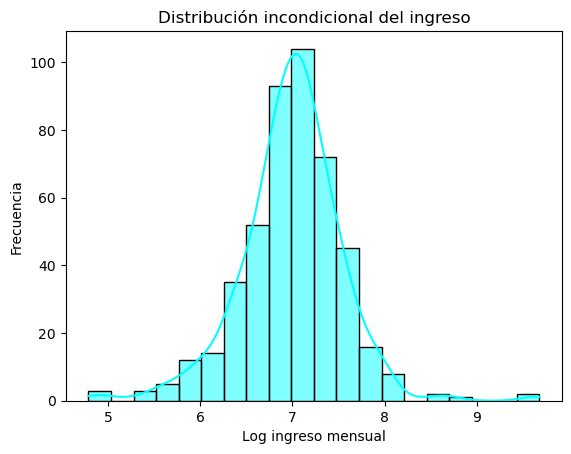

In [529]:
sns.histplot(venezolanos['log_ingreso_mensual'], kde=True, color="cyan", bins=20)
plt.title("Distribución incondicional del ingreso")
plt.xlabel("Log ingreso mensual")
plt.ylabel("Frecuencia")
plt.show()

### 2.2. Horas Mensual - VI

#### 2.2.1. Gráfico sobre la relación entre horas de trabajo y logaritmo del ingreso mensual

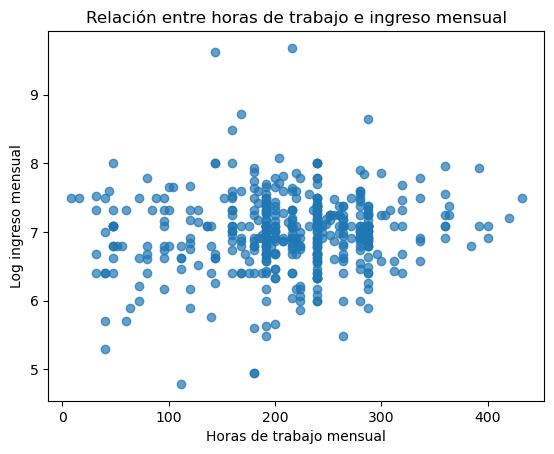

In [532]:
plt.scatter(venezolanos['horas_mensual'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.title('Relación entre horas de trabajo e ingreso mensual')
plt.xlabel('Horas de trabajo mensual')
plt.ylabel('Log ingreso mensual')
plt.show()

#### 2.2.2. Regresión lineal simple

In [534]:
venezolanos = venezolanos.dropna(subset=['horas_mensual', 'log_ingreso_mensual'])

In [535]:
X = sm.add_constant(venezolanos['horas_mensual'])  # Agregar una constante para el intercepto
y = venezolanos['log_ingreso_mensual']
model2 = sm.OLS(y, X).fit()
y_pred = model2.predict(X)
print(model2.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_mensual   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     4.892
Date:                 Fri, 31 Jan 2025   Prob (F-statistic):             0.0275
Time:                         21:56:07   Log-Likelihood:                -378.10
No. Observations:                  467   AIC:                             760.2
Df Residuals:                      465   BIC:                             768.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.8330      0.076 

#### 2.2.3. Interpretación

#### 2.2.4. Prueba White

In [538]:
residuos = model2.resid

# Prueba de White
white_test = het_white(residuos, X)
print("\nPrueba de White:")
print(f"Estadístico LM: {white_test[0]:.4f}")
print(f"p-value LM: {white_test[1]:.4f}")


Prueba de White:
Estadístico LM: 7.1777
p-value LM: 0.0276


El p-value de la Prueba de White es 0.0276 (mucho menor que 0.05), lo que significa que hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad. Los residuos presentan heterocedasticidad

#### 2.2.5. Línea de regresión

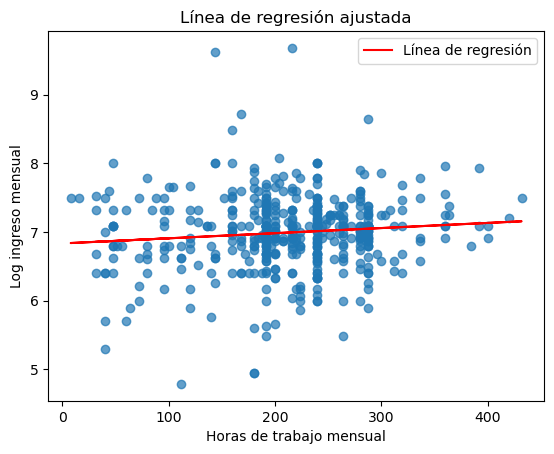

In [541]:
plt.scatter(venezolanos['horas_mensual'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.plot(venezolanos['horas_mensual'], y_pred, color='red', label='Línea de regresión')
plt.title('Línea de regresión ajustada')
plt.xlabel('Horas de trabajo mensual')
plt.ylabel('Log ingreso mensual')
plt.legend()
plt.show()

### 2.3. Trabajó en Venezuela - VI

#### 2.3.1. Gráfico sobre la relación entre si trabajó previamente en Venezuela y logaritmo del ingreso mensual

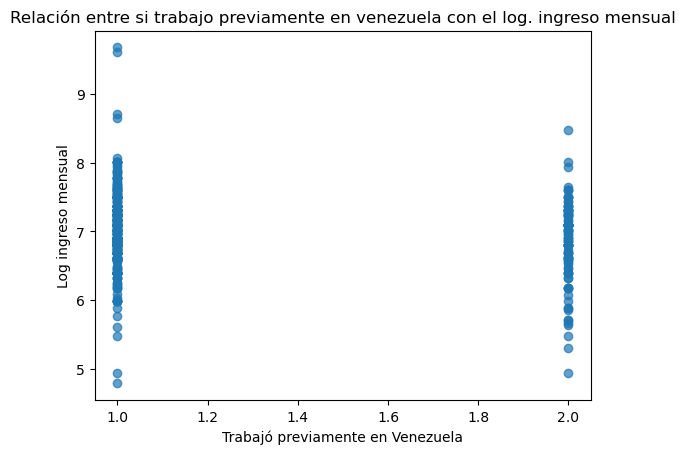

In [544]:
plt.scatter(venezolanos['trabajo_venezuela'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.title('Relación entre si trabajo previamente en venezuela con el log. ingreso mensual')
plt.xlabel('Trabajó previamente en Venezuela')
plt.ylabel('Log ingreso mensual')
plt.show()

#### 2.3.2. Regresión Lineal Simple

In [546]:
X = sm.add_constant(venezolanos['trabajo_venezuela'])  # Agregar una constante para el intercepto
y = venezolanos['log_ingreso_mensual']
model3 = sm.OLS(y, X).fit()
y_pred = model3.predict(X)
print(model3.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_mensual   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                  0.017
Method:                  Least Squares   F-statistic:                     8.957
Date:                 Fri, 31 Jan 2025   Prob (F-statistic):            0.00291
Time:                         21:56:08   Log-Likelihood:                -376.09
No. Observations:                  467   AIC:                             756.2
Df Residuals:                      465   BIC:                             764.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.2106

#### 2.3.3. Interpretación

#### 2.3.4. Prueba White

In [549]:
residuos = model3.resid

# Prueba de White
white_test = het_white(residuos, X)
print("\nPrueba de White:")
print(f"Estadístico LM: {white_test[0]:.4f}")
print(f"p-value LM: {white_test[1]:.4f}")


Prueba de White:
Estadístico LM: 0.7453
p-value LM: 0.3880


El p-value de la Prueba de White es 0.3880 (mucho mayor que 0.05), lo que significa que no hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad. Los residuos presentan homocedasticidad, es decir, la varianza de los errores es constante.

#### 2.3.5. Línea de regresión

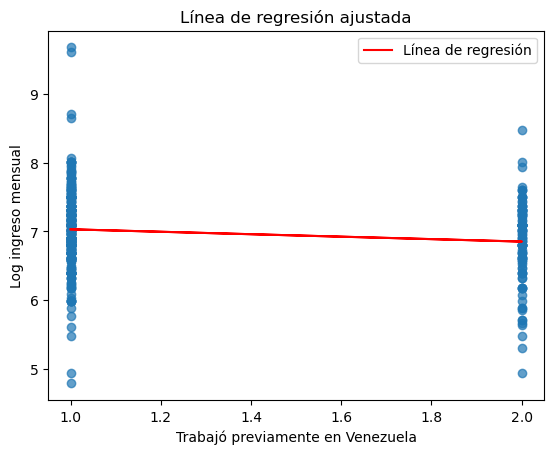

In [552]:
plt.scatter(venezolanos['trabajo_venezuela'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.plot(venezolanos['trabajo_venezuela'], y_pred, color='red', label='Línea de regresión')
plt.title('Línea de regresión ajustada')
plt.xlabel('Trabajó previamente en Venezuela')
plt.ylabel('Log ingreso mensual')
plt.legend()
plt.show()

### 2.4. Trabajo Formal - VI

#### 2.4.1. Gráfico sobre la relación entre trabajo formal y logaritmo del ingreso mensual

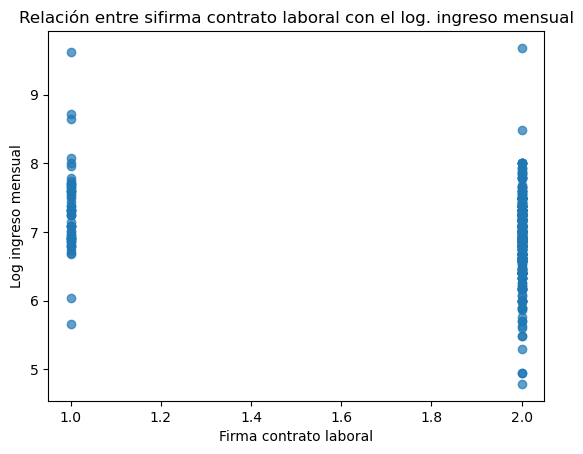

In [555]:
plt.scatter(venezolanos['firma_contrato'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.title('Relación entre sifirma contrato laboral con el log. ingreso mensual')
plt.xlabel('Firma contrato laboral')
plt.ylabel('Log ingreso mensual')
plt.show()

#### 2.4.2. Regresión Lineal Simple

In [557]:
X = sm.add_constant(venezolanos['firma_contrato'])  # Agregar una constante para el intercepto
y = venezolanos['log_ingreso_mensual']
model4 = sm.OLS(y, X).fit()
y_pred = model4.predict(X)
print(model4.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_mensual   R-squared:                       0.047
Model:                             OLS   Adj. R-squared:                  0.045
Method:                  Least Squares   F-statistic:                     22.88
Date:                 Fri, 31 Jan 2025   Prob (F-statistic):           2.32e-06
Time:                         21:56:09   Log-Likelihood:                -369.33
No. Observations:                  467   AIC:                             742.7
Df Residuals:                      465   BIC:                             751.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.6641      0.1

#### 2.4.3. Interpretación

#### 2.4.4. Prueba White

In [560]:
residuos = model4.resid

# Prueba de White
white_test = het_white(residuos, X)
print("\nPrueba de White:")
print(f"Estadístico LM: {white_test[0]:.4f}")
print(f"p-value LM: {white_test[1]:.4f}")


Prueba de White:
Estadístico LM: 0.8566
p-value LM: 0.3547


El p-value de la Prueba de White es 0.3547 (mucho mayor que 0.05), lo que significa que no hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad. Los residuos presentan homocedasticidad, es decir, la varianza de los errores es constante.

#### 2.4.5. Línea de regresión

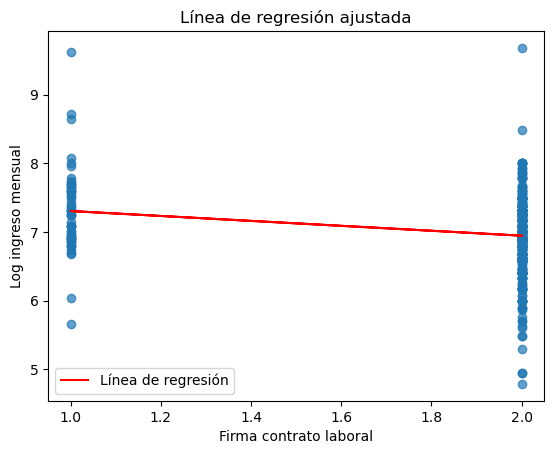

In [563]:
plt.scatter(venezolanos['firma_contrato'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.plot(venezolanos['firma_contrato'], y_pred, color='red', label='Línea de regresión')
plt.title('Línea de regresión ajustada')
plt.xlabel('Firma contrato laboral')
plt.ylabel('Log ingreso mensual')
plt.legend()
plt.show()

### 2.5. Edad - VI

#### 2.5.1. Gráfico sobre la relación entre edad y logaritmo del ingreso mensual

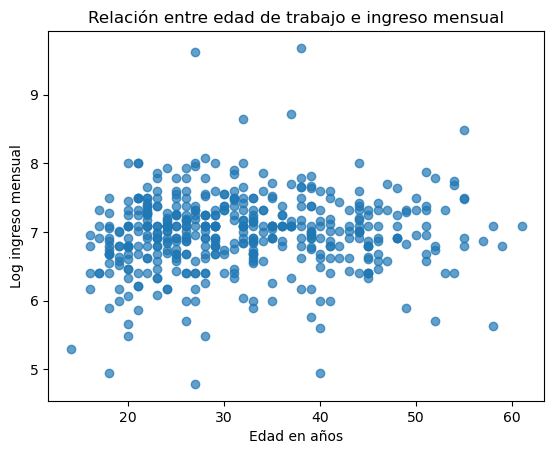

In [567]:
plt.scatter(venezolanos['edad'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.title('Relación entre edad de trabajo e ingreso mensual')
plt.xlabel('Edad en años')
plt.ylabel('Log ingreso mensual')
plt.show()

#### 2.5.2. Regresión Lineal Simple

In [634]:
X = sm.add_constant(venezolanos['edad']) 
y = venezolanos['log_ingreso_mensual']
model5 = sm.OLS(y, X).fit()
y_pred = model5.predict(X)
print(model5.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_mensual   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                  0.005
Method:                  Least Squares   F-statistic:                     3.120
Date:                 Fri, 31 Jan 2025   Prob (F-statistic):             0.0780
Time:                         22:00:42   Log-Likelihood:                -378.99
No. Observations:                  467   AIC:                             762.0
Df Residuals:                      465   BIC:                             770.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8489      0.084     81.30

#### 2.6.3. Interpretación

#### 2.6.4. Prueba White

In [636]:
residuos = model5.resid

# Prueba de White
white_test = het_white(residuos, X)
print("\nPrueba de White:")
print(f"Estadístico LM: {white_test[0]:.4f}")
print(f"p-value LM: {white_test[1]:.4f}")


Prueba de White:
Estadístico LM: 0.3044
p-value LM: 0.8588


El p-value de la Prueba de White es 0.8588 (mucho mayor que 0.05), lo que significa que no hay evidencia suficiente para rechazar la hipótesis nula de homocedasticidad. Los residuos presentan homocedasticidad, es decir, la varianza de los errores es constante.

## 3. Regresión Múltiple